# Importing required libraries and data

In [30]:
# Import the pandas library, which is a popular data manipulation and analysis library in Python
import pandas as pd

# Specify the file path of the CSV file you want to read
file ="C:\\Users\\varsh\\Downloads\\netflix_titles.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame
df.head(20)

show_id     type                                              title  \
0       s1    Movie                               Dick Johnson Is Dead   
1       s2  TV Show                                      Blood & Water   
2       s3  TV Show                                          Ganglands   
3       s4  TV Show                              Jailbirds New Orleans   
4       s5  TV Show                                       Kota Factory   
5       s6  TV Show                                      Midnight Mass   
6       s7    Movie                   My Little Pony: A New Generation   
7       s8    Movie                                            Sankofa   
8       s9  TV Show                      The Great British Baking Show   
9      s10    Movie                                       The Starling   
10     s11  TV Show                Vendetta: Truth, Lies and The Mafia   
11     s12  TV Show                                   Bangkok Breaking   
12     s13    Movie                                       Je Suis Karl   
13     s14    Movie                   Confessions of an Invisible Girl   
14     s15  TV Show                    Crime Stories: India Detectives   
15     s16  TV Show                                  Dear White People   
16     s17    Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
17     s18  TV Show                                    Falsa identidad   
18     s19    Movie                                          Intrusion   
19     s20  TV Show                                             Jaguar   

                                         director  \
0                                 Kirsten Johnson   
1                                             NaN   
2                                 Julien Leclercq   
3                                             NaN   
4                                             NaN   
5                                   Mike Flanagan   
6                   Robert Cullen, José Luis Ucha   
7                                    Haile Gerima   
8                                 Andy Devonshire   
9                                  Theodore Melfi   
10                                            NaN   
11                              Kongkiat Komesiri   
12                            Christian Schwochow   
13                                  Bruno Garotti   
14                                            NaN   
15                                            NaN   
16  Pedro de Echave García, Pablo Azorín Williams   
17                                            NaN   
18                                     Adam Salky   
19                                            NaN   

                                                 cast  \
0                                                 NaN   
1   Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                 NaN   
4   Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5   Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
10                                                NaN   
11  Sukollawat Kanarot, Sushar Manaying, Pavarit M...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
13  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   
14                                                NaN   
15  Logan Browning, Brandon P. Bell, DeRon Horton,...   
16                                                NaN   
17  Luis Ernesto Franco, Camila Sodi, Sergio Goyri...   
18  Freida Pinto, Logan Marshall-Green, Robert Joh...   
19  Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...   

                                              country          date_added  \
0                                       United States  Sept

# Look at a couple of texts

In [31]:
# Print the first 400 characters of the "text" column for the row at index 2666
print(repr(df.iloc[2666]["description"][0:400]))

# Print the first 400 characters of the "text" column for the row at index 4726
print(repr(df.iloc[4726]["description"][0:400]))

'Kenya Barris and his family navigate relationships, race and culture while grappling with their newfound success in this comedy series.'
'City girl Veera is kidnapped on the eve of her wedding, but as her captors take her through the countryside, Veera finds herself feeling emancipated.'


# Split speech into sentences

In [32]:
# Import the re (regular expression) module
import re
# Apply a lambda function to the "text" column
# The lambda function splits the text into paragraphs using the regular expression pattern '\.\s*\n'
df["paragraphs"] = df["description"].map(lambda text: re.split('\.\s*\n', text))
# Create a new column "number_of_paragraphs"
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# installing a spacy

In [33]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


## TF-IDF Vectorization of Text Data

In [34]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words='english',
min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the DataFrame and transform it into a sparse matrix
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])
# Print the shape of the resulting sparse matrix
tfidf_text_vectors.shape

(8807, 4653)

# Data frame of sentences

In [35]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "description": paragraph, "release_year": year }
for paragraphs, year in zip(df["paragraphs"], df["release_year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

description  release_year
0  As her father nears the end of his life, filmm...          2020
1  After crossing paths at a party, a Cape Town t...          2021
2  To protect his family from a powerful drug lor...          2021
3  Feuds, flirtations and toilet talk go down amo...          2021
4  In a city of coaching centers known to train I...          2021
5  The arrival of a charismatic young priest brin...          2021
6  Equestria's divided. But a bright-eyed hero be...          2021
7  On a photo shoot in Ghana, an American model s...          1993
8  A talented batch of amateur bakers face off in...          2021
9  A woman adjusting to life after a loss contend...          2021

# TFIDF of the sentences DF

In [36]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the paragraph_df DataFrame and transform it into a sparse matrix
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["description"])
# Print the shape of the resulting sparse matrix
tfidf_para_vectors.shape

(8807, 4653)

# NMF Topic Modeling

In [37]:
# Import the NMF class from the sklearn.decomposition module
from sklearn.decomposition import NMF

In [38]:
# Create an instance of the NMF class with 10 components (topics) and a random state of 42
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the tfidf_text_vectors (document-term matrix) and transform it to obtain the document-topic matrix
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Get the topic-word matrix from the fitted NMF model
H_text_matrix = nmf_text_model.components_

## LDA Topic Modeling

In [39]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]]*100.0/total)))
            
# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())
    


Topic 00
 world (2.53)
 documentary (1.88)
 series (1.64)
 war (0.86)
 follows (0.70)

Topic 01
 young (3.64)
 man (2.88)
 woman (2.56)
 father (0.99)
 mother (0.64)

Topic 02
 school (6.15)
 high (5.26)
 student (1.55)
 students (1.23)
 teen (1.18)

Topic 03
 life (9.73)
 death (0.73)
 career (0.66)
 real (0.63)
 changing (0.43)

Topic 04
 new (8.45)
 york (2.28)
 city (1.85)
 finds (1.07)
 home (0.94)

Topic 05
 family (7.08)
 home (1.24)
 father (1.02)
 years (0.82)
 returns (0.78)

Topic 06
 love (7.41)
 falls (1.88)
 true (1.06)
 romance (0.97)
 fall (0.95)

Topic 07
 old (6.99)
 year (6.02)
 girl (0.74)
 home (0.72)
 boy (0.71)

Topic 08
 special (3.35)
 stand (3.33)
 comedy (2.36)
 comedian (1.95)
 takes (1.64)

Topic 09
 friends (5.48)
 best (1.96)
 help (1.14)
 save (0.83)
 fun (0.73)


## Topic Modeling with TF-IDF Vectorization and NMF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have tfidf_text_vectorizer defined

# Get feature names from the TfidfVectorizer object
feature_names = tfidf_text_vectorizer.get_feature_names_out()

# Now, use the display_topics function with the correct feature names
display_topics(nmf_text_model, feature_names)


Topic 00
 world (2.53)
 documentary (1.88)
 series (1.64)
 war (0.86)
 follows (0.70)

Topic 01
 young (3.64)
 man (2.88)
 woman (2.56)
 father (0.99)
 mother (0.64)

Topic 02
 school (6.15)
 high (5.26)
 student (1.55)
 students (1.23)
 teen (1.18)

Topic 03
 life (9.73)
 death (0.73)
 career (0.66)
 real (0.63)
 changing (0.43)

Topic 04
 new (8.45)
 york (2.28)
 city (1.85)
 finds (1.07)
 home (0.94)

Topic 05
 family (7.08)
 home (1.24)
 father (1.02)
 years (0.82)
 returns (0.78)

Topic 06
 love (7.41)
 falls (1.88)
 true (1.06)
 romance (0.97)
 fall (0.95)

Topic 07
 old (6.99)
 year (6.02)
 girl (0.74)
 home (0.72)
 boy (0.71)

Topic 08
 special (3.35)
 stand (3.33)
 comedy (2.36)
 comedian (1.95)
 takes (1.64)

Topic 09
 friends (5.48)
 best (1.96)
 help (1.14)
 save (0.83)
 fun (0.73)


## Discovering Topics in Paragraphs using NMF

In [41]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 world (2.53)
 documentary (1.88)
 series (1.64)
 war (0.86)
 follows (0.70)

Topic 01
 young (3.64)
 man (2.88)
 woman (2.56)
 father (0.99)
 mother (0.64)

Topic 02
 school (6.15)
 high (5.26)
 student (1.55)
 students (1.23)
 teen (1.18)

Topic 03
 life (9.73)
 death (0.73)
 career (0.66)
 real (0.63)
 changing (0.43)

Topic 04
 new (8.45)
 york (2.28)
 city (1.85)
 finds (1.07)
 home (0.94)

Topic 05
 family (7.08)
 home (1.24)
 father (1.02)
 years (0.82)
 returns (0.78)

Topic 06
 love (7.41)
 falls (1.88)
 true (1.06)
 romance (0.97)
 fall (0.95)

Topic 07
 old (6.99)
 year (6.02)
 girl (0.74)
 home (0.72)
 boy (0.71)

Topic 08
 special (3.35)
 stand (3.33)
 comedy (2.36)
 comedian (1.95)
 takes (1.64)

Topic 09
 friends (5.48)
 best (1.96)
 help (1.14)
 save (0.83)
 fun (0.73)


## Percentage Contribution of Topics in Document-Term Matrix

In [42]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.1905117 , 16.97630329,  9.15864984, 10.27297434, 10.41421766,
       10.34298172,  8.8286931 ,  7.33193737,  8.46000311, 10.02372787])

# Topic sizes

In [43]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 8.1905117 , 16.97630329,  9.15864984, 10.27297434, 10.41421766,
       10.34298172,  8.8286931 ,  7.33193737,  8.46000311, 10.02372787])

## Count Vectorization with Stopwords Removed

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
count_para_vectors.shape


(8807, 4653)

## LDA Topic Modeling on Paragraph Count Vectors

In [45]:
lda_para_model = LatentDirichletAllocation(n_components = 10,
random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
print(count_para_vectors.shape)


(8807, 4652)


C:\Users\varsh\.ipynb_checkpoints\New folder\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


## Displaying Topics from LDA Model

In [47]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
letters ward worlds following stanley

Topic 2:
lost letters women nephew tournament

Topic 3:
letters younger male credit women

Topic 4:
younger lost giants familiar scholarship

Topic 5:
nephew truck younger women officials

Topic 6:
worlds ward saudi nephew stormy

Topic 7:
familiar women stalks lost come

Topic 8:
nephew teaches agent prince soap

Topic 9:
letters nephew scholarship comedians serial

Topic 10:
french worlds serial saudi christian


## para matrix

In [48]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.56647968, 10.22943206, 10.67621518, 10.91799048,  8.38279998,
       10.19758223, 10.72724233,  9.62964104, 10.05437237, 10.61824465])

## Word Cloud Visualization of Topics

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

## Generating Word Clouds for NMF Topics

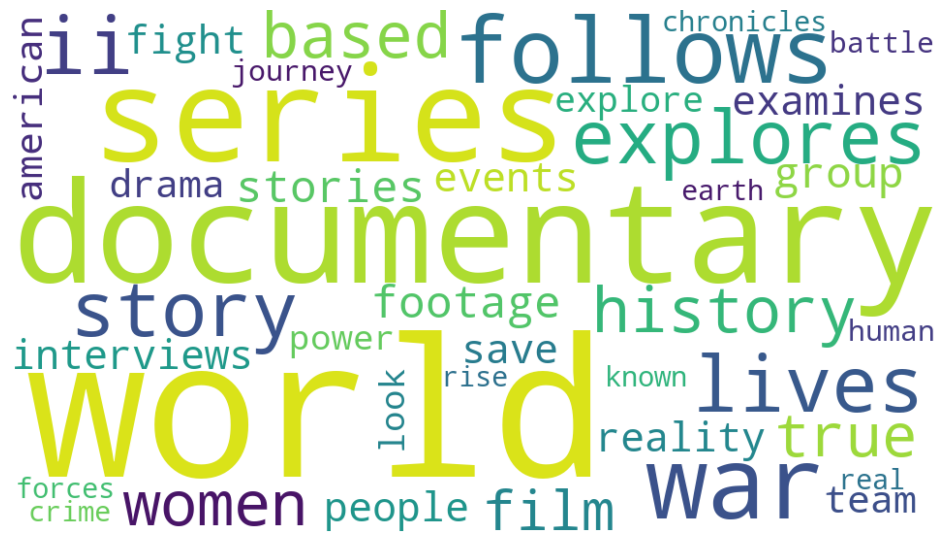

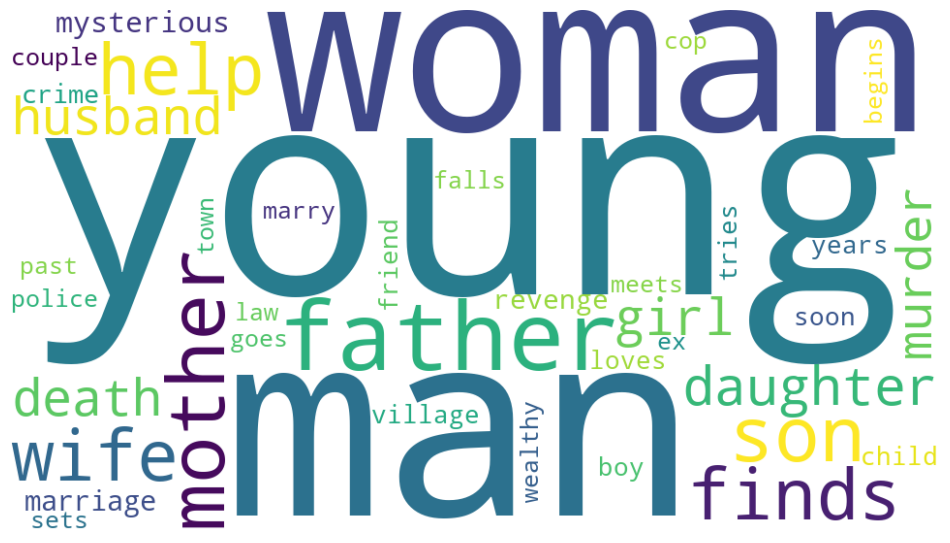

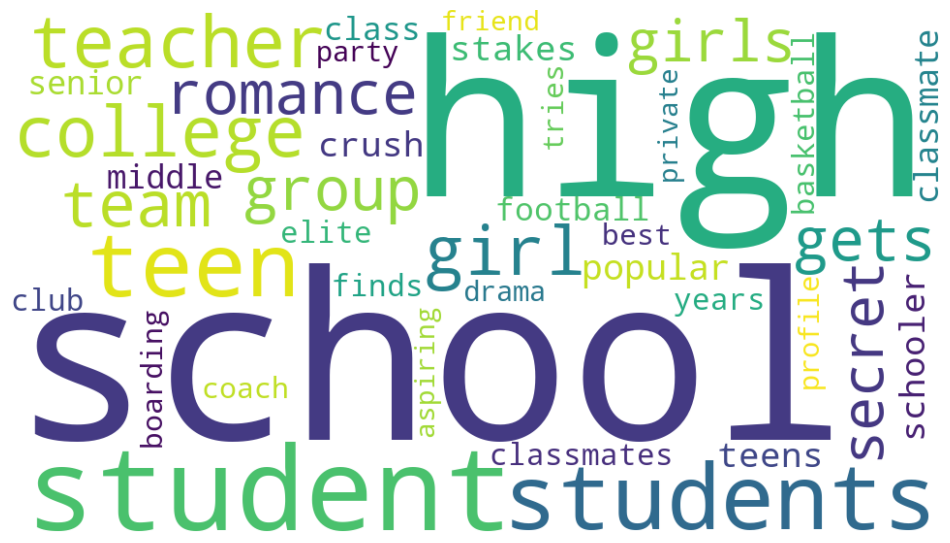

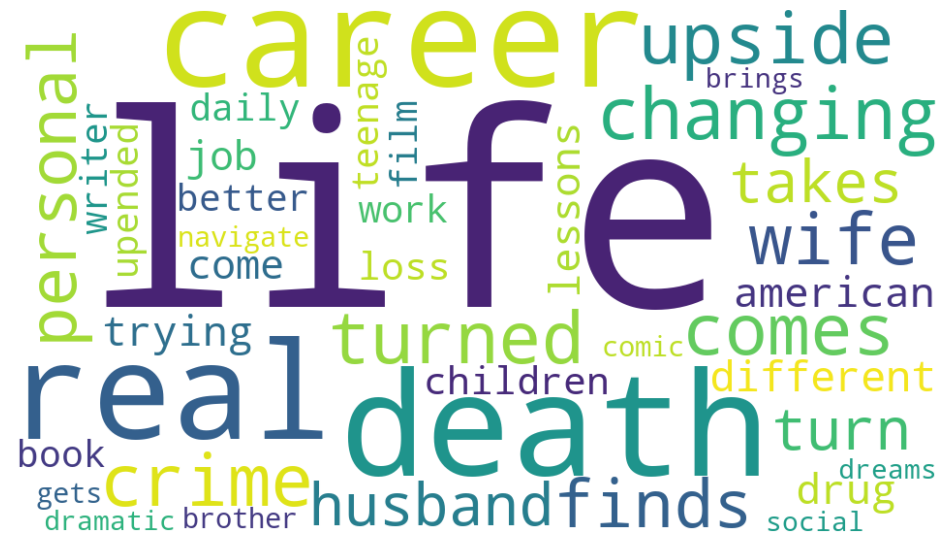

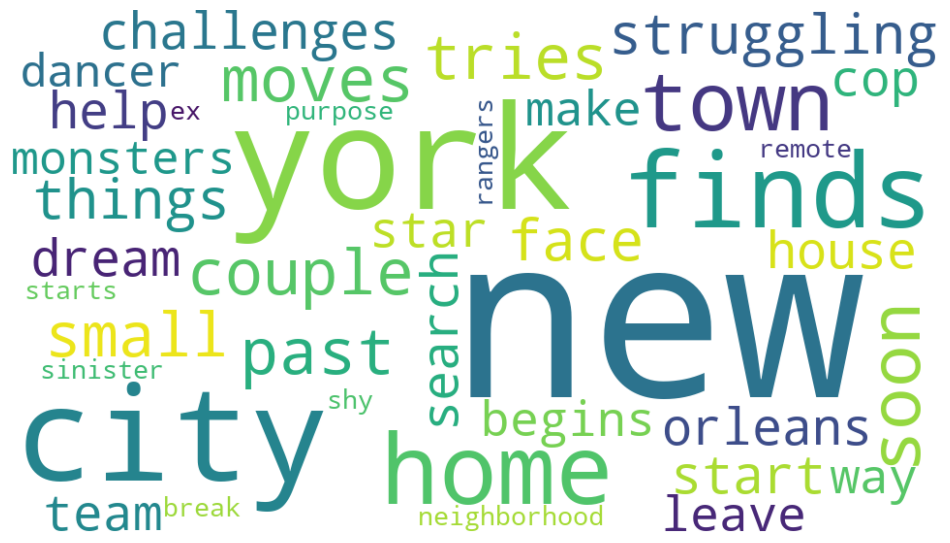

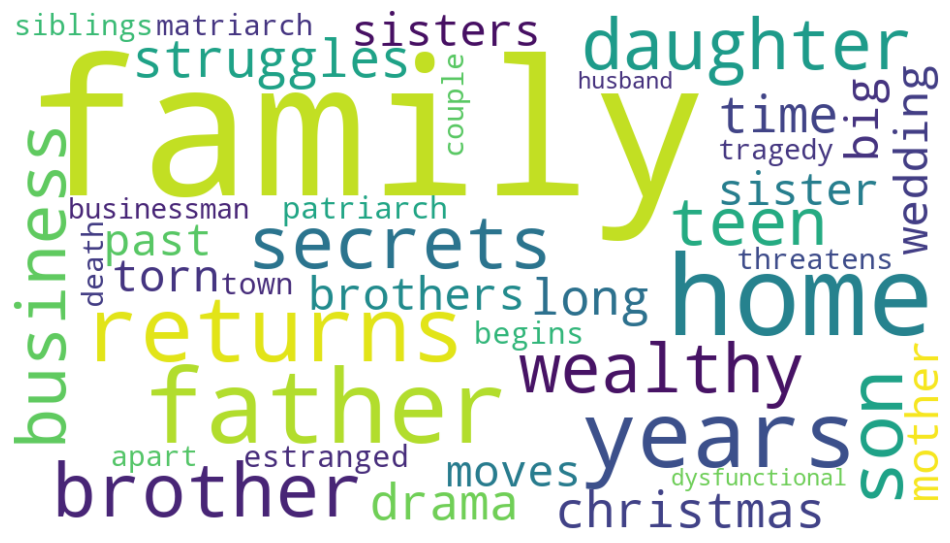

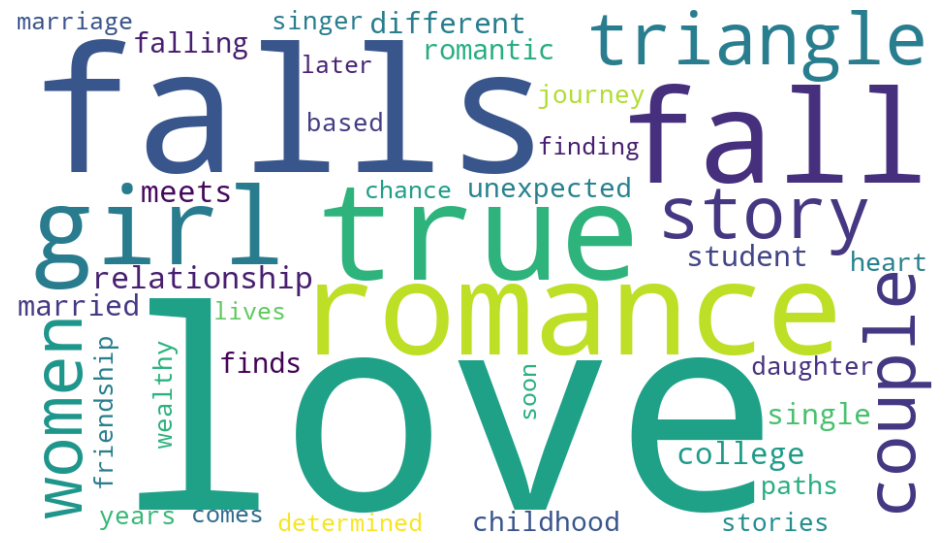

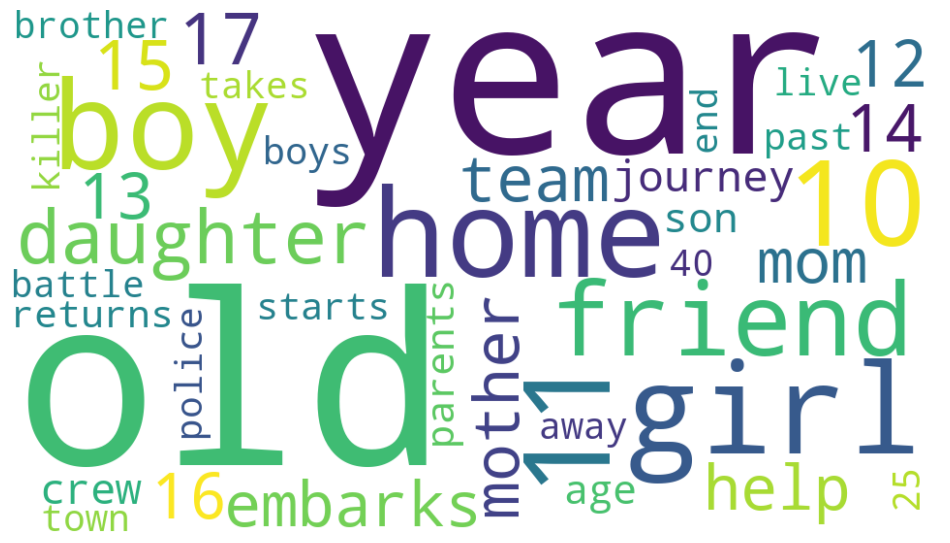

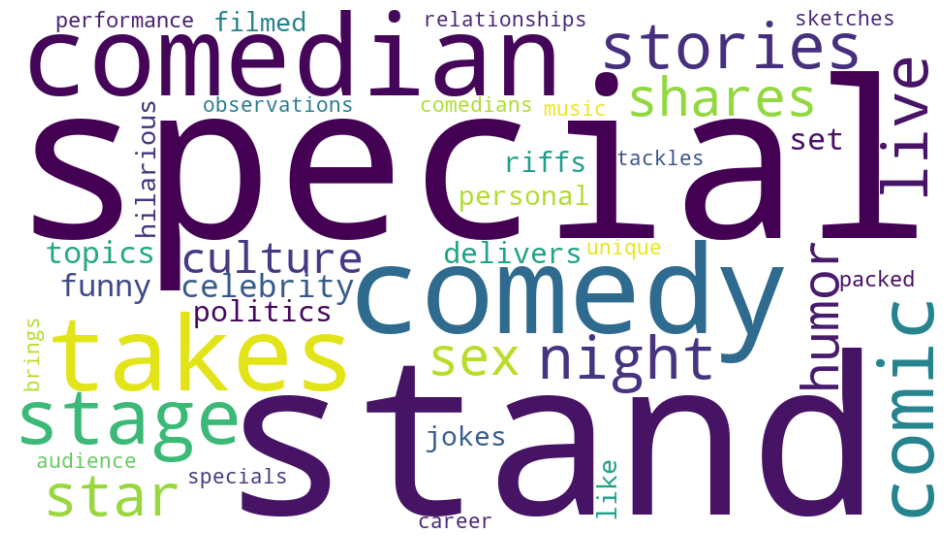

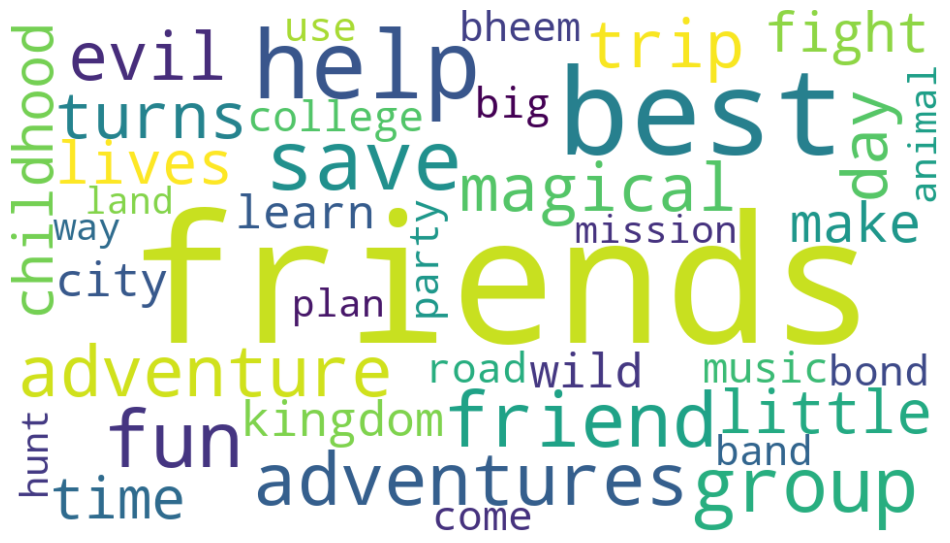

In [50]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## Creating Word Clouds for LDA Topics

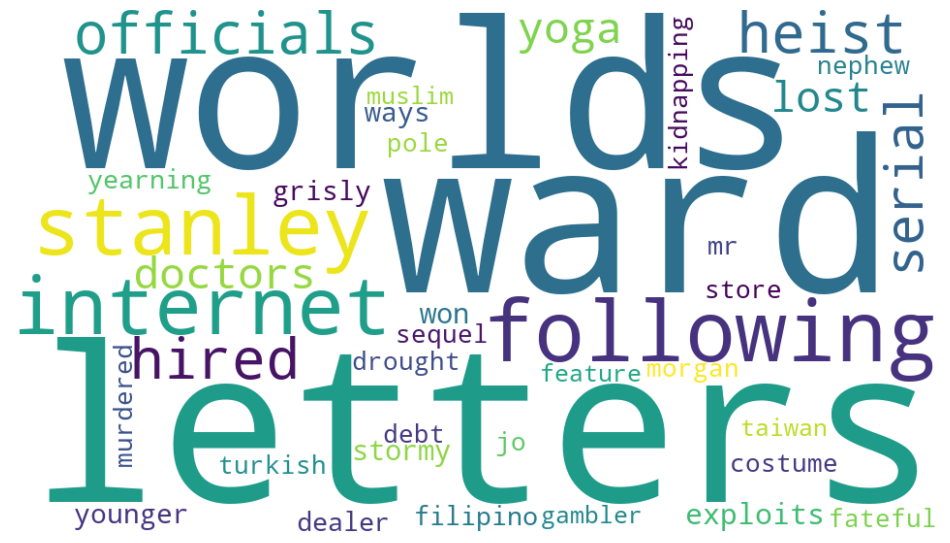

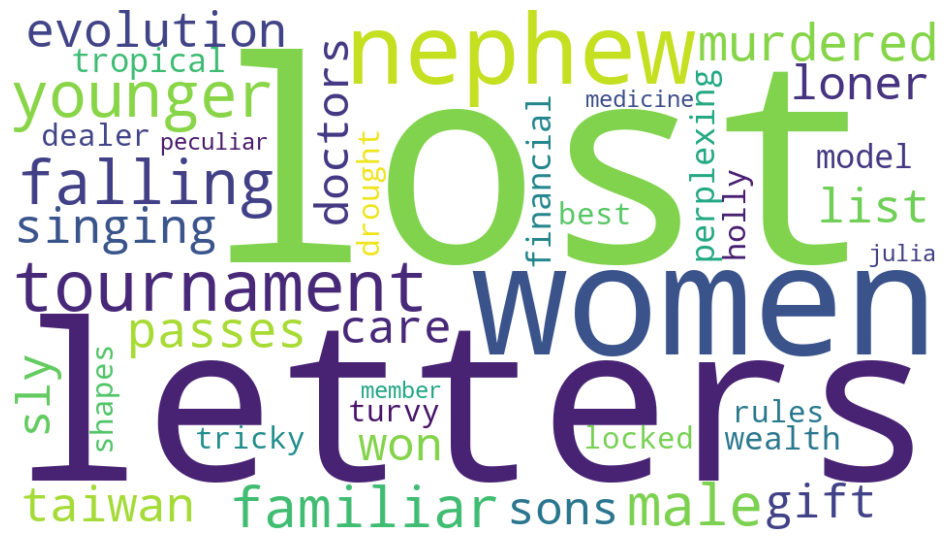

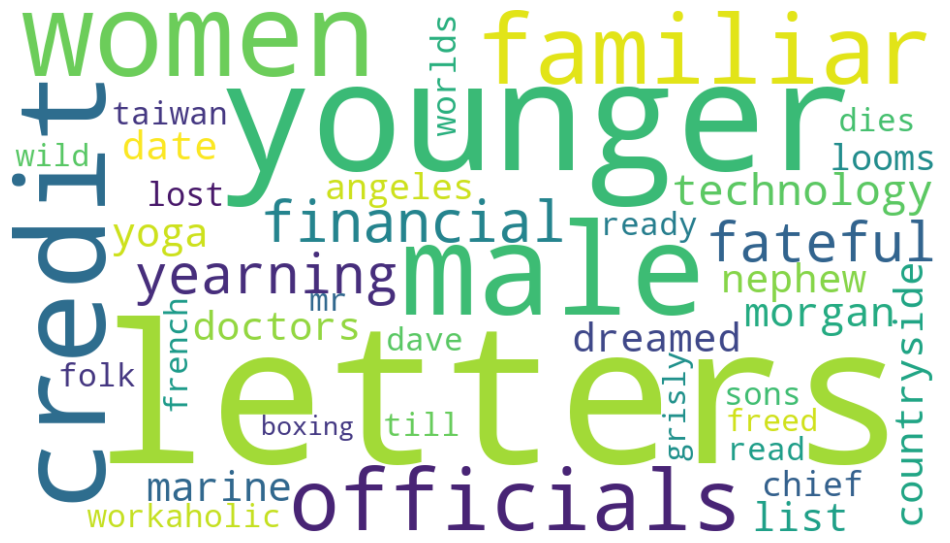

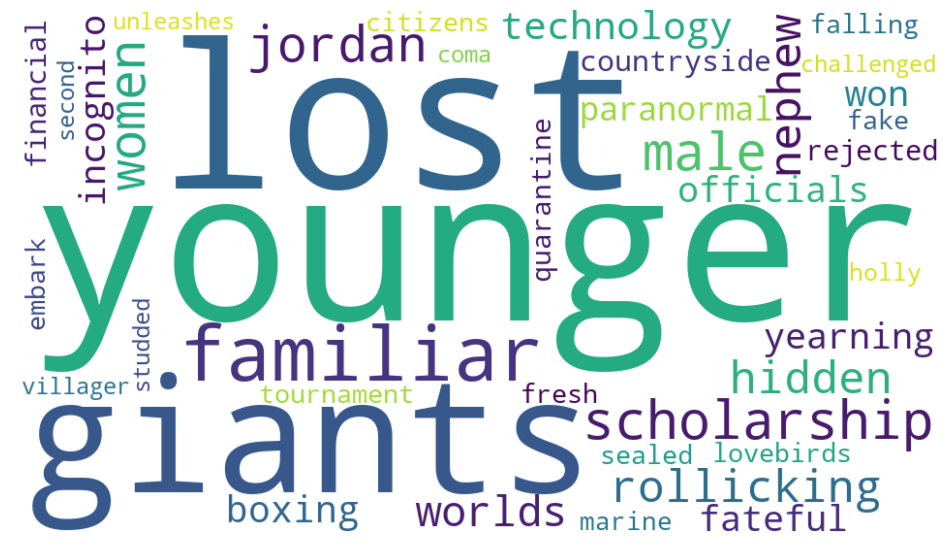

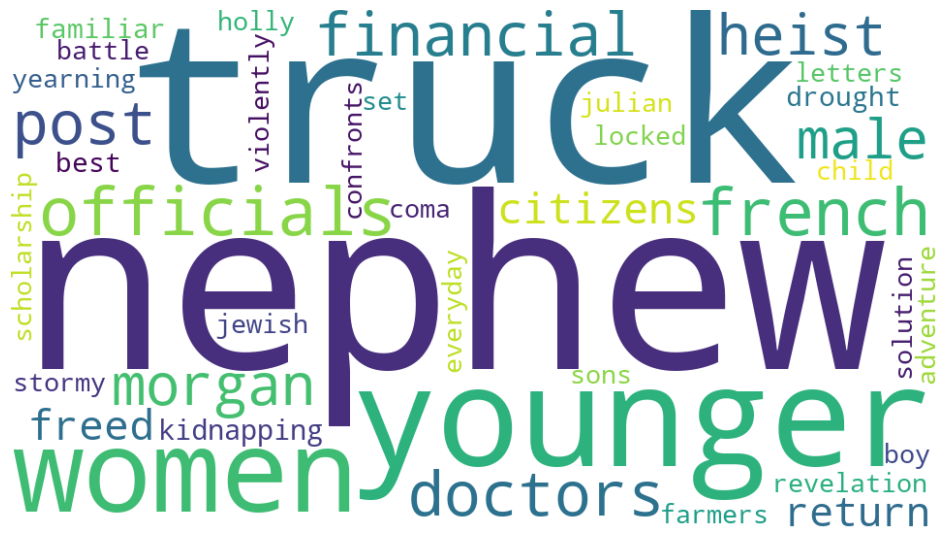

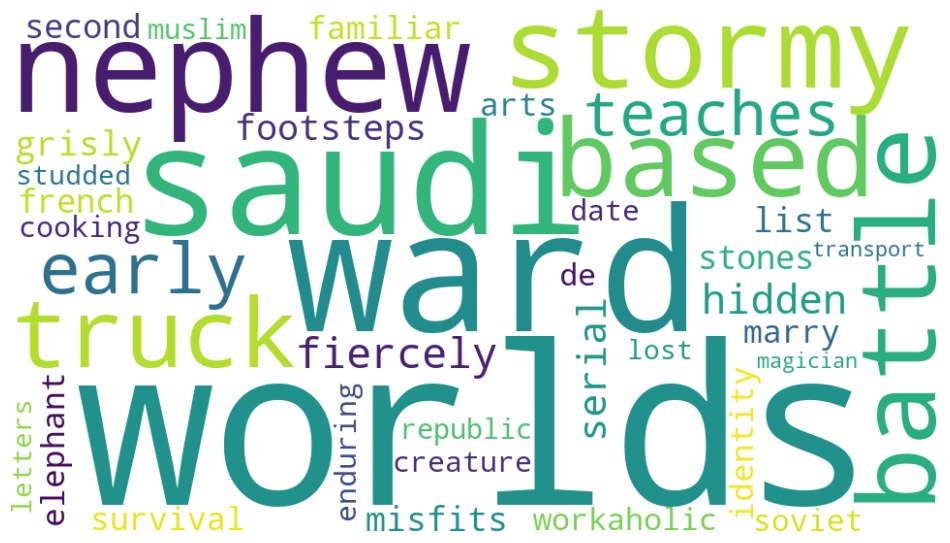

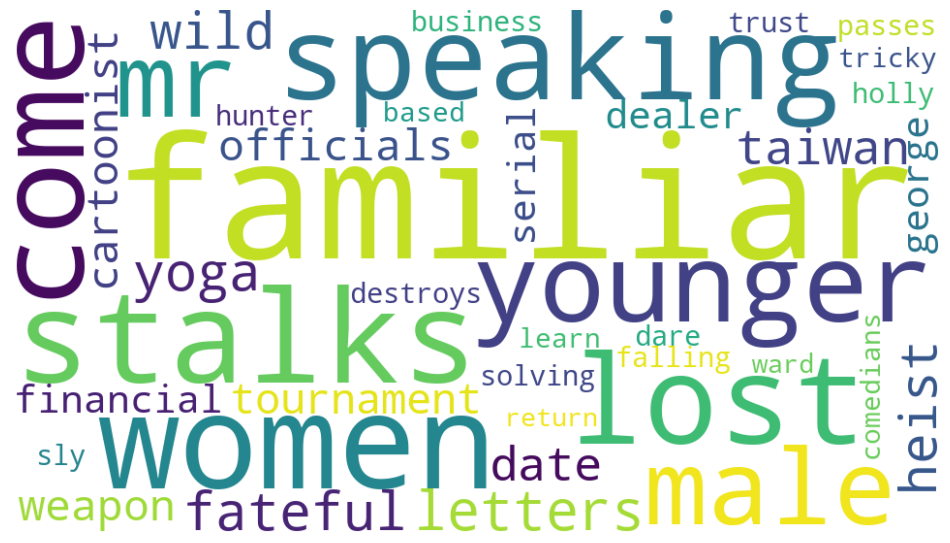

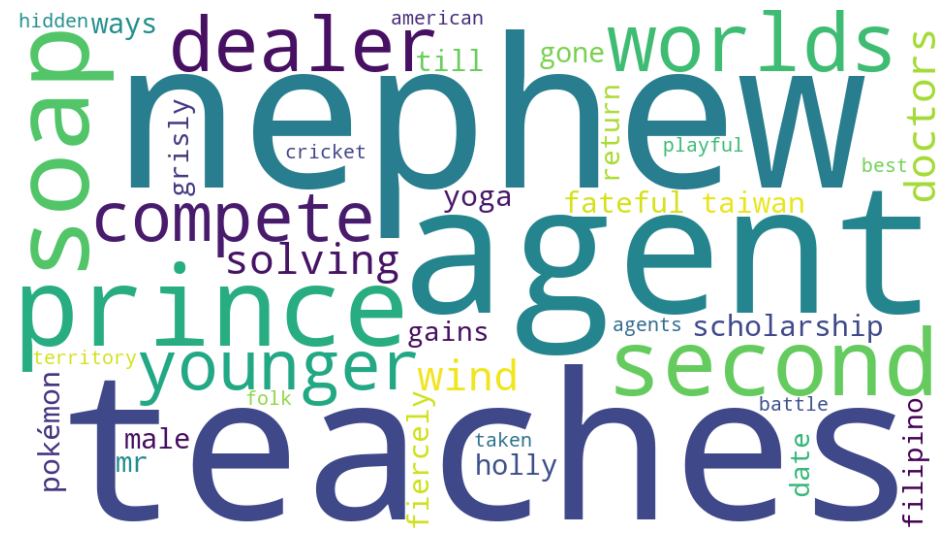

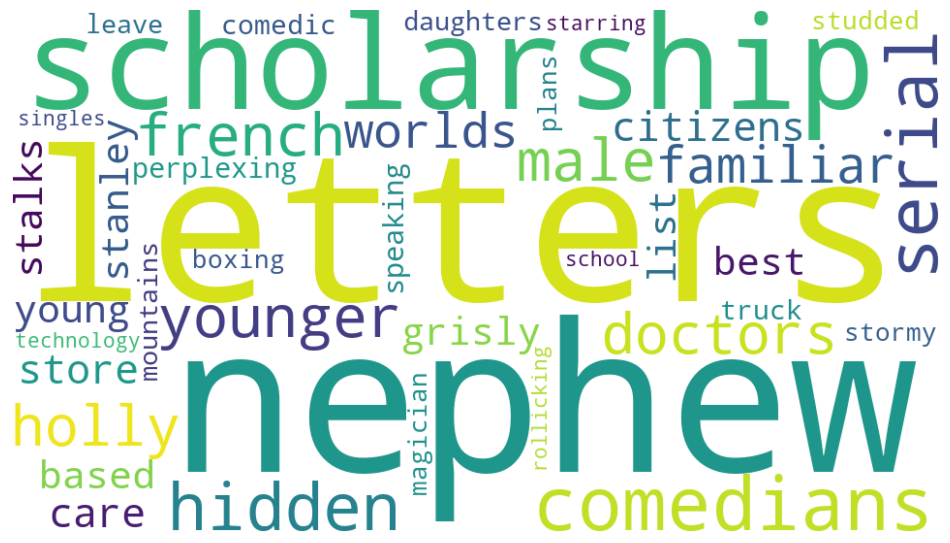

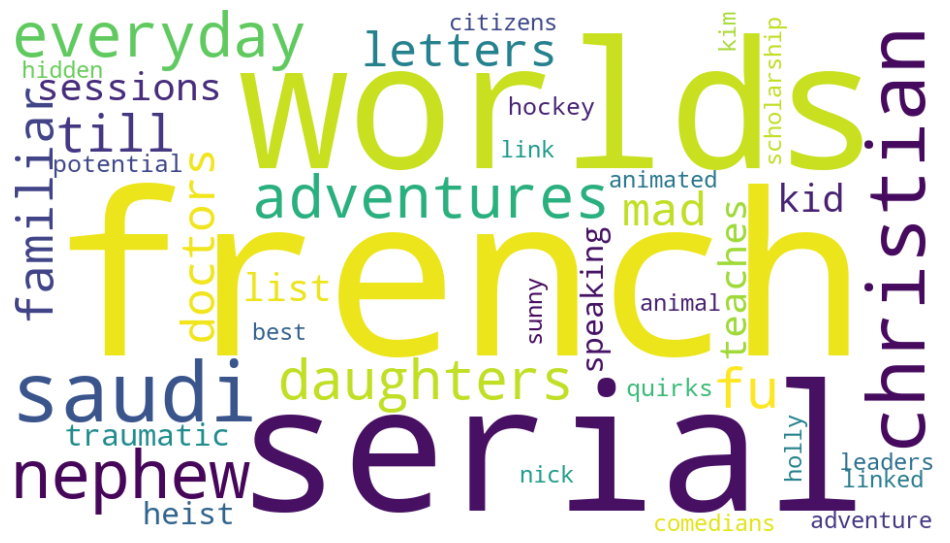

In [51]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Extracting Top Words for NMF Topics

In [52]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

## Calculating Topic Distribution by Year

In [53]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["release_year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["release_year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/74 [00:00<?, ?it/s]

## Plotting Topic Distribution Over Time

<Axes: xlabel='rating'>

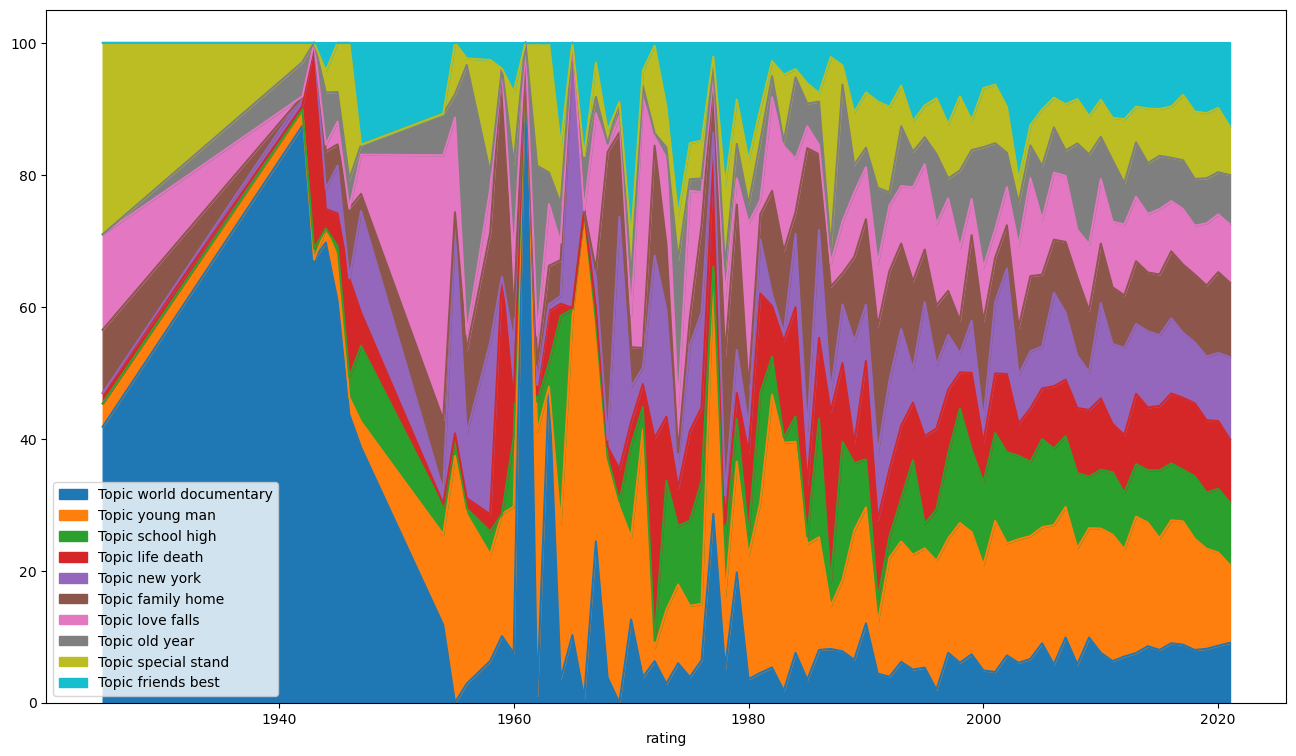

In [54]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["rating"] +
topic_names).set_index("rating")
df_year.plot.area(figsize=(16,9))